In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [46]:
df=pd.read_csv("../../data/FM_Acq_Perf_FMAC_EPOCH1_ML.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,0,0,100094030068,3,7.75,152000,1999-11-01,2000-01-01,85.0,1.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
1,1,1,100118647578,2,7.75,106000,1999-11-01,2000-01-01,80.0,2.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
2,2,2,100687390672,1,8.00,120000,1999-11-01,2000-01-01,77.0,1.0,...,7.67,7.7375,0.022164,6.06,0.16,-0.33,0.2625,0.020408,-0.043025,0.033926
3,3,3,102134561765,2,8.50,206000,1999-11-01,2000-01-01,80.0,1.0,...,7.67,7.7375,0.022164,6.06,0.66,-0.83,0.7625,0.084184,-0.108214,0.098546
4,4,4,102389202525,1,7.75,140000,1999-11-01,2000-01-01,78.0,2.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117966 entries, 0 to 1117965
Data columns (total 60 columns):
Unnamed: 0                    1117966 non-null int64
Unnamed: 0.1                  1117966 non-null int64
id                            1117966 non-null int64
origChannel                   1117966 non-null int64
origIntRate                   1117966 non-null float64
origUPB                       1117966 non-null int64
origDate                      1117966 non-null object
firstPmtDate                  1117966 non-null object
origLTV                       1117966 non-null float64
numBorrowers                  1117966 non-null float64
origDebtIncRatio              1117966 non-null float64
borrCreditScore               1117966 non-null float64
loanPurp                      1117966 non-null int64
zipCode                       1117966 non-null int64
pMIperct                      1117966 non-null float64
mortInsType                   1117966 non-null float64
bestCreditScore        

## Remove columns not involved in 'Foreclosure or Not' query

In [48]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt','servActivIndicator',\
         'deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117966 entries, 0 to 1117965
Data columns (total 30 columns):
origChannel           1117966 non-null int64
origIntRate           1117966 non-null float64
origUPB               1117966 non-null int64
origDate              1117966 non-null object
origLTV               1117966 non-null float64
numBorrowers          1117966 non-null float64
origDebtIncRatio      1117966 non-null float64
borrCreditScore       1117966 non-null float64
loanPurp              1117966 non-null int64
zipCode               1117966 non-null int64
pMIperct              1117966 non-null float64
mortInsType           1117966 non-null float64
bestCreditScore       1117966 non-null float64
worstCreditScore      1117966 non-null float64
avgCreditScore        1117966 non-null float64
bankNumber            1117966 non-null int64
stateNumber           1117966 non-null int64
mSA                   1117966 non-null int64
zeroBalCode           1117966 non-null float64
fmacRateM

## Engineer originDate into Date features

In [50]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [51]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [52]:
df.drop(['origDate'],1,inplace=True)

In [53]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,1999,11
1,1999,11
2,1999,11
3,1999,11
4,1999,11


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [54]:
df.zeroBalCode.unique()

array([ 1.,  9.,  6.,  2.,  3., 16., 15.])

In [55]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [56]:
df.zeroBalCode.unique()

array([0., 1.])

In [57]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117966 entries, 0 to 1117965
Data columns (total 31 columns):
origChannel           1117966 non-null int64
origIntRate           1117966 non-null float64
origUPB               1117966 non-null int64
origLTV               1117966 non-null float64
numBorrowers          1117966 non-null float64
origDebtIncRatio      1117966 non-null float64
borrCreditScore       1117966 non-null float64
loanPurp              1117966 non-null int64
zipCode               1117966 non-null int64
pMIperct              1117966 non-null float64
mortInsType           1117966 non-null float64
bestCreditScore       1117966 non-null float64
worstCreditScore      1117966 non-null float64
avgCreditScore        1117966 non-null float64
bankNumber            1117966 non-null int64
stateNumber           1117966 non-null int64
mSA                   1117966 non-null int64
zeroBalCode           1117966 non-null float64
fmacRateMax           1117966 non-null float64
fmacRate

# Review values for dates and slice (if needed) the timeframe you want

In [58]:
df.origYear.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008],
      dtype=int64)

In [59]:
df['origMonth'].unique()

array([11, 10,  2,  1, 12,  3,  5,  9,  8,  7,  6,  4], dtype=int64)

# Coerce the column dtype (int in this case)

In [60]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117966 entries, 0 to 1117965
Data columns (total 31 columns):
origChannel           1117966 non-null int64
origIntRate           1117966 non-null float64
origUPB               1117966 non-null int64
origLTV               1117966 non-null int32
numBorrowers          1117966 non-null int32
origDebtIncRatio      1117966 non-null int32
borrCreditScore       1117966 non-null int32
loanPurp              1117966 non-null int64
zipCode               1117966 non-null int64
pMIperct              1117966 non-null float64
mortInsType           1117966 non-null int32
bestCreditScore       1117966 non-null int32
worstCreditScore      1117966 non-null int32
avgCreditScore        1117966 non-null int32
bankNumber            1117966 non-null int64
stateNumber           1117966 non-null int64
mSA                   1117966 non-null int64
zeroBalCode           1117966 non-null object
fmacRateMax           1117966 non-null float64
fmacRateMin           111

In [62]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Review metrics last time before run (to have record of starting values)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117966 entries, 0 to 1117965
Data columns (total 31 columns):
origChannel           1117966 non-null int64
origIntRate           1117966 non-null float64
origUPB               1117966 non-null int64
origLTV               1117966 non-null int32
numBorrowers          1117966 non-null int32
origDebtIncRatio      1117966 non-null int32
borrCreditScore       1117966 non-null int32
loanPurp              1117966 non-null int64
zipCode               1117966 non-null int64
pMIperct              1117966 non-null float64
mortInsType           1117966 non-null int32
bestCreditScore       1117966 non-null int32
worstCreditScore      1117966 non-null int32
avgCreditScore        1117966 non-null int32
bankNumber            1117966 non-null int64
stateNumber           1117966 non-null int64
mSA                   1117966 non-null int64
zeroBalCode           1117966 non-null object
fmacRateMax           1117966 non-null float64
fmacRateMin           111

In [64]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,3,7.75,152000,85,1,41,604,2,891,25.0,...,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616,1999,11
1,2,7.75,106000,80,2,27,652,2,972,0.0,...,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616,1999,11
2,1,8.00,120000,77,1,54,664,1,809,0.0,...,0.022164,6.06,0.16,-0.33,0.2625,0.020408,-0.043025,0.033926,1999,11
3,2,8.50,206000,80,1,35,710,2,190,0.0,...,0.022164,6.06,0.66,-0.83,0.7625,0.084184,-0.108214,0.098546,1999,11
4,1,7.75,140000,78,2,49,584,2,992,0.0,...,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616,1999,11


# Pycaret - Setup with categorical definition

### Use feature engineering, polynomial features, trig feats, PCA

In [65]:
# models=setup(df, target = 'rateDiffPct',
#              feature_interaction=True, feature_ratio=True,
#              polynomial_features=True, pca=True, pca_components=10,
#             numeric_features = ['origUPB','origLTV','numBorrowers','origDebtIncRatio',\
#                                'avgCreditScore'],
#             ignore_features = ['origIntRate','rank','deal'])

### Use feature engineering, polynomial features, trig feats

In [66]:
models=setup(df, target = 'zeroBalCode', categorical_features = ['numBorrowers', 'mortInsType'],
            numeric_features = ['origLTV', 'origDebtIncRatio', 'borrCreditScore', 'bestCreditScore', 'worstCreditScore',
                               'avgCreditScore'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2697
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1117966, 31)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with blacklist exclusions

In [67]:
model_results=compare_models(fold = 2, turbo = True)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.7942,0.7993,0.3154,0.6151,0.417,0.3074
1,CatBoost Classifier,0.7931,0.7998,0.3236,0.6065,0.422,0.3099
2,Gradient Boosting Classifier,0.786,0.7862,0.2152,0.6195,0.3195,0.2264
3,Extreme Gradient Boosting,0.7853,0.785,0.2,0.6247,0.303,0.214
4,Ada Boost Classifier,0.7797,0.7707,0.2451,0.5647,0.3418,0.2335
5,Extra Trees Classifier,0.774,0.7487,0.2226,0.5381,0.3149,0.2065
6,Ridge Classifier,0.7718,0,0.0885,0.5728,0.1533,0.0968
7,Linear Discriminant Analysis,0.7717,0.733,0.1688,0.5351,0.2566,0.1628
8,Random Forest Classifier,0.7699,0.7188,0.216,0.5166,0.3046,0.1936
9,Logistic Regression,0.7668,0.6427,0.006,0.5062,0.0118,0.0066


## Create models - store in variable

In [68]:
cat = create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8002,0.8119,0.3306,0.6392,0.4358,0.3290
1,0.7980,0.8092,0.3454,0.6211,0.4439,0.3325
2,0.7921,0.8014,0.3273,0.6004,0.4237,0.3100
3,0.7963,0.7987,0.3324,0.6181,0.4323,0.3216
4,0.8058,0.8161,0.3636,0.6497,0.4663,0.3589
5,0.7934,0.7980,0.3176,0.6099,0.4177,0.3070
6,0.7950,0.7960,0.3165,0.6188,0.4188,0.3099
7,0.8028,0.8161,0.3571,0.6386,0.4580,0.3491
8,0.7922,0.7988,0.3275,0.6004,0.4238,0.3102
9,0.7991,0.8076,0.3499,0.6240,0.4484,0.3373


## Tune Models

In [69]:
tuned_cat = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7984,0.8088,0.3213,0.6346,0.4266,0.3199
1,0.7948,0.8072,0.3339,0.6106,0.4317,0.3194
2,0.7926,0.8006,0.3273,0.6028,0.4243,0.3111
3,0.7941,0.7964,0.3237,0.6112,0.4232,0.3121
4,0.8048,0.8146,0.3598,0.6467,0.4624,0.3547
5,0.7924,0.7979,0.3231,0.6027,0.4207,0.3080
6,0.7964,0.7938,0.3253,0.6220,0.4272,0.3179
7,0.8073,0.8154,0.3653,0.6565,0.4694,0.3631
8,0.7909,0.7978,0.3160,0.5985,0.4136,0.3009
9,0.7992,0.8088,0.3576,0.6213,0.4539,0.3417


## Ensemble models

In [70]:
cat_bagged = ensemble_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7975,0.8111,0.3103,0.6357,0.4171,0.3116
1,0.7977,0.8086,0.3333,0.6253,0.4348,0.3253
2,0.7929,0.8014,0.3180,0.6077,0.4175,0.3063
3,0.7962,0.7984,0.3209,0.6227,0.4236,0.3148
4,0.8017,0.8158,0.3406,0.6412,0.4449,0.3377
5,0.7920,0.7971,0.3056,0.6078,0.4067,0.2969
6,0.7952,0.7958,0.3056,0.6249,0.4104,0.3037
7,0.8068,0.8172,0.3521,0.6615,0.4596,0.3550
8,0.7900,0.7989,0.3061,0.5979,0.4049,0.2932
9,0.8001,0.8074,0.3461,0.6307,0.4470,0.3374


## Evaluate Models

In [ ]:
# interpret_model(estimator=lgbm, plot='reason')

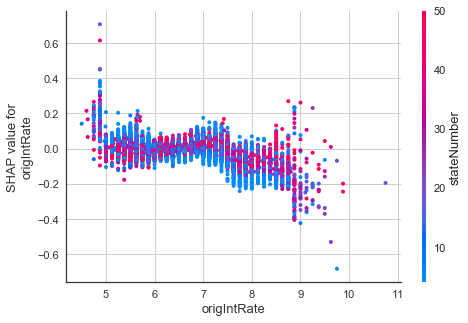

In [73]:
interpret_model(estimator=cat, plot='correlation')

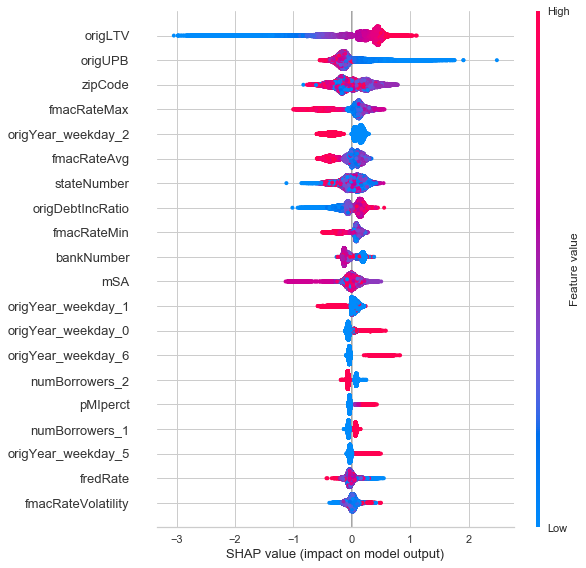

In [74]:
interpret_model(estimator=cat, plot='summary')